In [1]:
#Paquetes para obtener información de una URL (URIParser), Visualizador (VegaLite)
using Pkg
Pkg.add(["URIParser", "VegaLite"])
using URIParser, VegaLite

  Updating registry at `C:\Users\joc_h\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %.4 % Resolving package versions...
  Updating `C:\Users\joc_h\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\joc_h\.julia\environments\v1.0\Manifest.toml`
 [no changes]


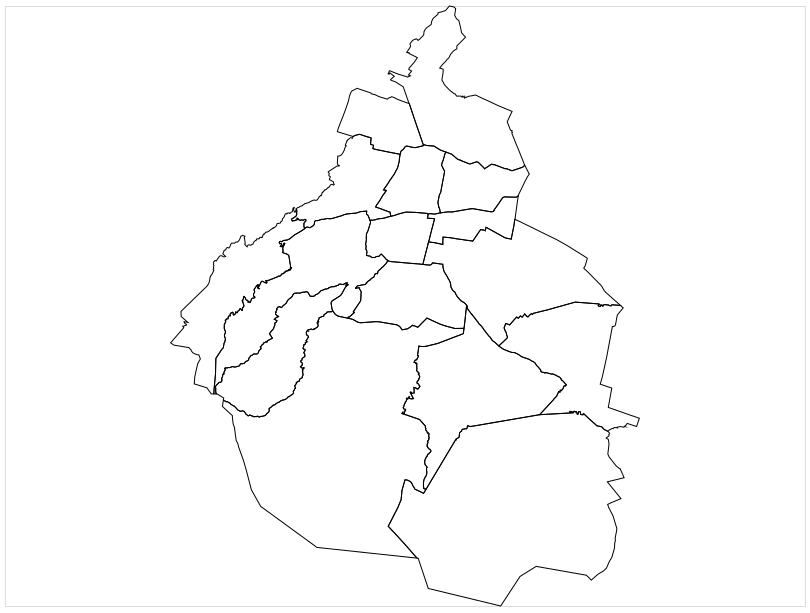

In [2]:
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape,
        fill=:transparent,
        stroke=:black
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/alcaldias.json"),
        format={
            typ=:topojson,
            feature=:alcaldias
        }
    },
    projection={
        typ=:albers
    }
)

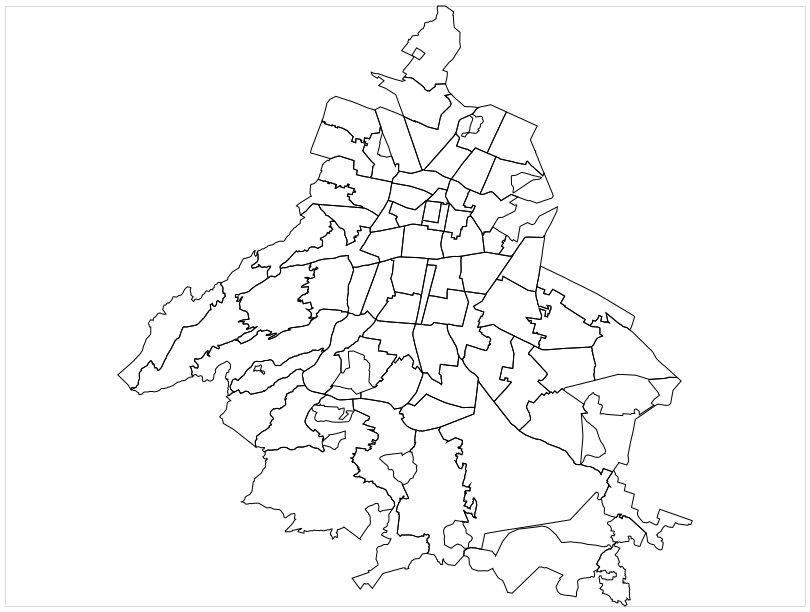

In [3]:
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape,
        fill=:transparent,
        stroke=:black
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/sectorescdmx.json"),
        format={
            typ=:topojson,
            feature=:"OGRGeoJSON"
        }     
    
    },
    projection={
        typ=:albers
    }
)

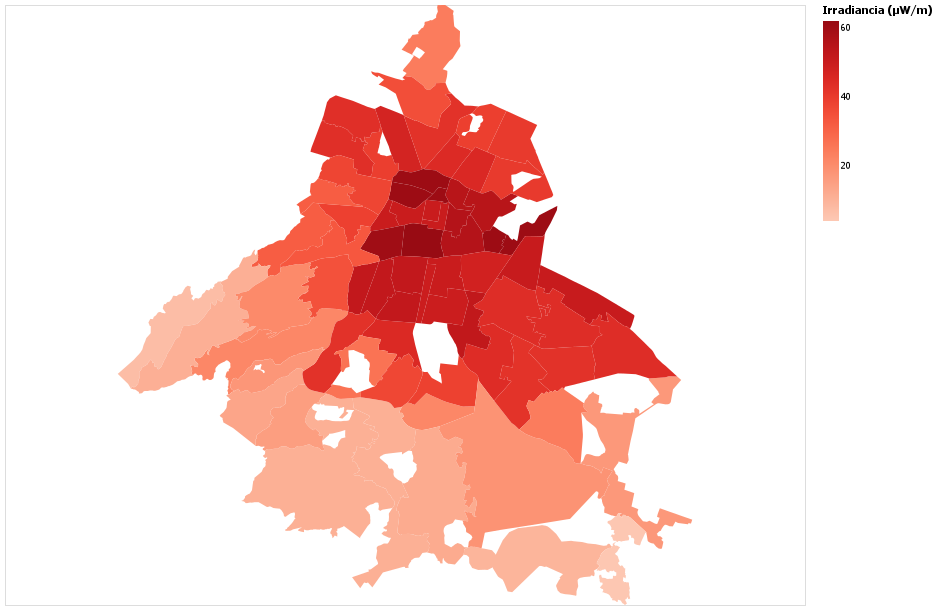

In [4]:
cdmxirr = URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/irradianciasector.csv")
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape    
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/sectorescdmx.json"),
        format={
            typ=:topojson,
            feature=:"OGRGeoJSON"
        }     
    
    },
    transform=[{
        lookup="properties.sector",
        from={
            data={
                url=cdmxirr,
                format={
                    typ=:csv
                }
            },
            key=:Sectores,
            fields=["Irradiancia"]
        }
    }],
    color={
        "Irradiancia:q",
        scale={domain=[4, 62], scheme=:reds},
        legend={title="Irradiancia (µW/m)"}
    },
    projection={
        typ=:albers
    }
)